In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low = -90, high = 90, size = 1500)
lngs = np.random.uniform(low = -180, high = 180, size = 1500)
lat_lngs = zip(lats, lngs)

lat_lngs

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)
#coordinates

In [4]:
# Import Citipy
from citipy import citipy

In [5]:
# Create a list for holding the cities
cities = []

## Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

In [6]:
# Check the cities created at random
cities

['mogadishu',
 'mataura',
 'barentsburg',
 'palekh',
 'lensk',
 'tiksi',
 'ponta delgada',
 'cayenne',
 'nanortalik',
 'belushya guba',
 'castro',
 'anloga',
 'sitio novo do tocantins',
 'anadyr',
 'puerto ayora',
 'bluff',
 'atuona',
 'vila',
 'rafai',
 'mar del plata',
 'cape town',
 'kapaa',
 'ushuaia',
 'bambanglipuro',
 'baruun-urt',
 'chokurdakh',
 'toulepleu',
 'avarua',
 'tautira',
 'tura',
 'manzil tamim',
 'fort nelson',
 'lerwick',
 'atbasar',
 'laguna',
 'provideniya',
 'dariba',
 'arraial do cabo',
 'jamestown',
 'sioux lookout',
 'ahipara',
 'punta arenas',
 'katherine',
 'khatanga',
 'hit',
 'hermanus',
 'halifax',
 'saskylakh',
 'san patricio',
 'pokanayevka',
 'san lorenzo',
 'esperance',
 'xicotencatl',
 'hilo',
 'cherskiy',
 'lata',
 'lesnoy',
 'hobart',
 'ixtapa',
 'lagoa',
 'torbay',
 'smithers',
 'yulara',
 'humberto de campos',
 'geraldton',
 'chuy',
 'loukhi',
 'tasiilaq',
 'yellowknife',
 'coihaique',
 'raga',
 'mackay',
 'new norfolk',
 'marsa matruh',
 'samus

In [7]:
city_data = []

In [8]:
# Import the requests library
import requests

# Import the API key
from config import weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data
city_data = []
# Print the neginning of the logging.
print( "Beginning Data Retrieval      ")
print("-------------------------------")

# Create counters
record_count = 1
set_count = 1

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

Beginning Data Retrieval      
-------------------------------


In [11]:
# Loop through all the cities in the list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for loggin purposes
    if (i % 60 == 0 and i >= 60):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city
    city_url = url + "&appid=" + weather_api_key + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        city_data.append({'City': city.title(),
                          'Lat': city_lat,
                          'Lng': city_lng,
                          'Max Temp': city_max_temp,
                          'Humidity': city_humidity,
                          'Cloudiness': city_clouds,
                          'Wind Speed': city_wind,
                          'Country': city_country,
                          'Date': city_date})
        
    # If an error is experienced, skip the city.
    except:
        print('City not found. Skipping...')
        pass
    
#    if (i > 20):
#        break
    
# Indicate that Data loading is complete
print('---------------------------------')
print('Data Retrieval Complete          ')
print('---------------------------------')


Processing Record 1 of Set 1 | mogadishu
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 4 of Set 1 | palekh
Processing Record 5 of Set 1 | lensk
Processing Record 6 of Set 1 | tiksi
Processing Record 7 of Set 1 | ponta delgada
Processing Record 8 of Set 1 | cayenne
Processing Record 9 of Set 1 | nanortalik
Processing Record 10 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 11 of Set 1 | castro
Processing Record 12 of Set 1 | anloga
Processing Record 13 of Set 1 | sitio novo do tocantins
Processing Record 14 of Set 1 | anadyr
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | vila
Processing Record 19 of Set 1 | rafai
Processing Record 20 of Set 1 | mar del plata
Processing Record 21 of Set 1 | cape town
Processing Record 22 of Set 1 | kapaa
Processing Record 23 of Set 1 | ushuaia
P

Processing Record 5 of Set 4 | limbang
Processing Record 6 of Set 4 | nome
Processing Record 7 of Set 4 | deputatskiy
Processing Record 8 of Set 4 | rawson
Processing Record 9 of Set 4 | sorvag
City not found. Skipping...
Processing Record 10 of Set 4 | felidhoo
City not found. Skipping...
Processing Record 11 of Set 4 | kavieng
Processing Record 12 of Set 4 | te anau
Processing Record 13 of Set 4 | lebu
Processing Record 14 of Set 4 | berdigestyakh
Processing Record 15 of Set 4 | qaanaaq
Processing Record 16 of Set 4 | hithadhoo
Processing Record 17 of Set 4 | wajima
Processing Record 18 of Set 4 | ugoofaaru
Processing Record 19 of Set 4 | ternate
Processing Record 20 of Set 4 | matara
Processing Record 21 of Set 4 | gravdal
Processing Record 22 of Set 4 | acari
Processing Record 23 of Set 4 | partur
Processing Record 24 of Set 4 | ponta do sol
Processing Record 25 of Set 4 | komsomolskiy
Processing Record 26 of Set 4 | tagbac
Processing Record 27 of Set 4 | inhambane
Processing Recor

Processing Record 16 of Set 7 | port hawkesbury
Processing Record 17 of Set 7 | lundamo
Processing Record 18 of Set 7 | campiglia marittima
Processing Record 19 of Set 7 | ozernovskiy
Processing Record 20 of Set 7 | galicea mare
Processing Record 21 of Set 7 | husavik
Processing Record 22 of Set 7 | bahia blanca
Processing Record 23 of Set 7 | amga
Processing Record 24 of Set 7 | kloulklubed
Processing Record 25 of Set 7 | dawei
Processing Record 26 of Set 7 | naze
Processing Record 27 of Set 7 | flinders
Processing Record 28 of Set 7 | sechura
Processing Record 29 of Set 7 | salalah
Processing Record 30 of Set 7 | olga
Processing Record 31 of Set 7 | redcar
Processing Record 32 of Set 7 | iracoubo
Processing Record 33 of Set 7 | gizo
Processing Record 34 of Set 7 | mumford
Processing Record 35 of Set 7 | la libertad
Processing Record 36 of Set 7 | paamiut
Processing Record 37 of Set 7 | gorodishche
Processing Record 38 of Set 7 | tezu
Processing Record 39 of Set 7 | northam
Processing

Processing Record 29 of Set 10 | kwekwe
Processing Record 30 of Set 10 | miahuatlan
Processing Record 31 of Set 10 | norilsk
Processing Record 32 of Set 10 | monsenhor gil
Processing Record 33 of Set 10 | pimenta bueno
Processing Record 34 of Set 10 | yonibana
Processing Record 35 of Set 10 | brownsville
Processing Record 36 of Set 10 | liverpool
Processing Record 37 of Set 10 | minsk
Processing Record 38 of Set 10 | negombo
Processing Record 39 of Set 10 | ust-omchug
Processing Record 40 of Set 10 | trois-pistoles
City not found. Skipping...
Processing Record 41 of Set 10 | ruteng
Processing Record 42 of Set 10 | kahului
Processing Record 43 of Set 10 | merauke
Processing Record 44 of Set 10 | vaitupu
City not found. Skipping...
Processing Record 45 of Set 10 | richards bay
Processing Record 46 of Set 10 | kenai
Processing Record 47 of Set 10 | larkana
Processing Record 48 of Set 10 | maningrida
Processing Record 49 of Set 10 | khorramabad
Processing Record 50 of Set 10 | quatre cocos

In [12]:
len(city_data)

565

In [13]:
# Create the DataFrame from the dictionary
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mogadishu,2.0371,45.3438,79.66,82,92,18.79,SO,2021-12-21 04:06:21
1,Mataura,-46.1927,168.8643,65.48,35,32,12.68,NZ,2021-12-21 04:10:20
2,Palekh,56.8028,41.8572,6.55,95,100,6.91,RU,2021-12-21 04:10:22
3,Lensk,60.7253,114.9278,-20.72,94,100,9.46,RU,2021-12-21 04:10:22
4,Tiksi,71.6872,128.8694,-14.12,98,100,9.98,RU,2021-12-21 04:10:23
...,...,...,...,...,...,...,...,...,...
560,Kyra,49.5776,111.9753,3.52,50,10,1.32,RU,2021-12-21 04:27:17
561,Coos Bay,43.3665,-124.2179,52.00,94,90,0.00,US,2021-12-21 04:27:18
562,Baoshan,46.5586,131.4244,5.32,83,98,16.46,CN,2021-12-21 04:27:19
563,Pangai,-19.8000,-174.3500,86.11,62,20,11.50,TO,2021-12-21 04:27:19


In [14]:
# Reorder the DataFrame columns
city_data_df = city_data_df[['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']]

In [15]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

In [19]:
# Import time module
import time

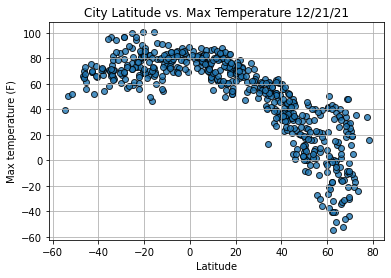

In [24]:
# Build the scatter plot for latitude versus max temperature
plt.scatter(lats,
            max_temps,
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime('%x'))
plt.ylabel('Max temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig1.png')

# Show plot
plt.show()

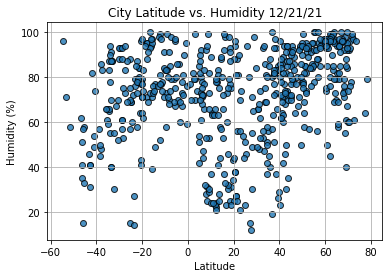

In [27]:
# Build the scatter plot for latitude versus humidity
plt.scatter(lats,
            humidity,
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity ' + time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig('weather_data/Fig2.png')

# Show plot
plt.show()

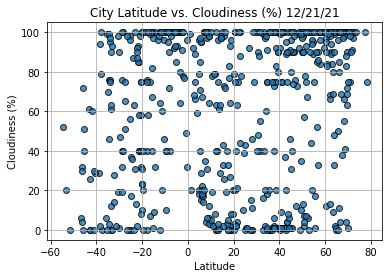

In [28]:
# Build the scatter plots for latitudes versus cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness (%) ' + time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig3.png')

# Show plot
plt.show()

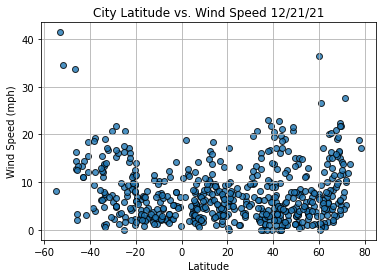

In [29]:
# Buils the scatter plot for latitude versus wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed ' + time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('weather_data/Fig4.png')

# Show plot
plt.show()